In [5]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
df_40_sr = pd.read_csv('../data/RV_O_040_R_SR_SK.CSV', sep=';')
df_40_sr.head()

,Kód štátu,Názov štátu,Pohlavie,Vek,Vzdelanie,Súčasná ekonomická aktivita,abs.
0,SK0,Slovenská republika,muž,0,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,29036
1,SK0,Slovenská republika,muž,1,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,30033
2,SK0,Slovenská republika,muž,2,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,30808
3,SK0,Slovenská republika,muž,3,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,31100
4,SK0,Slovenská republika,muž,4,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,30873


In [7]:
# # Vzdelanie
display(df_40_sr.groupby('Vzdelanie')['abs.'].sum())

Vzdelanie
bez ukončeného vzdelania – osoby vo veku 0-14 rokov                                                      623199
bez školského vzdelania – osoby vo veku 15 rokov a viac                                                   14987
nezistené                                                                                                226004
stredné odborné (učňovské) vzdelanie bez maturity (bližšie neuvedené)                                      6833
stredné odborné (učňovské) vzdelanie bez maturity a bez výučného listu (zaškolenie, zaučenie)             90310
stredné odborné (učňovské) vzdelanie bez maturity s vysvedčením o záverečnej skúške                      112295
stredné odborné (učňovské) vzdelanie bez maturity s výučným listom                                       837915
vysokoškolské vzdelanie (bližšie neuvedené)                                                                 444
vysokoškolské vzdelanie - 1. stupeň (Bc.)                                                     

In [8]:
display(df_40_sr.groupby('Súčasná ekonomická aktivita')['abs.'].sum())

Súčasná ekonomická aktivita
dieťa do začatia povinnej školskej dochádzky     389049
dôchodca                                        1056637
iná                                                7959
nezamestnaný                                     231731
nezistené                                        115740
osoba na materskej dovolenke                      20124
osoba na rodičovskej dovolenke                    52229
osoba v domácnosti                               306163
pracujúci (okrem dôchodcov)                     2172228
pracujúci dôchodca                               309310
príjemca kapitálových príjmov                      8465
študent vysokej školy                             96975
žiak strednej školy                              176307
žiak základnej školy                             506353
Name: abs., dtype: int64

In [9]:
university_student = df_40_sr[df_40_sr['Súčasná ekonomická aktivita'] == 'študent vysokej školy']
university_student.head()

,Kód štátu,Názov štátu,Pohlavie,Vek,Vzdelanie,Súčasná ekonomická aktivita,abs.
156,SK0,Slovenská republika,muž,17,úplné stredné vzdelanie s maturitou všeobecné,študent vysokej školy,1
160,SK0,Slovenská republika,muž,17,vyššie odborné vzdelanie nadstavbové (maturita...,študent vysokej školy,1
227,SK0,Slovenská republika,muž,18,úplné stredné vzdelanie s maturitou odborné (u...,študent vysokej školy,1
234,SK0,Slovenská republika,muž,18,úplné stredné vzdelanie s maturitou odborné,študent vysokej školy,4
242,SK0,Slovenská republika,muž,18,úplné stredné vzdelanie s maturitou všeobecné,študent vysokej školy,6


In [10]:
university_student = df_40_sr[df_40_sr['Súčasná ekonomická aktivita'] == 'študent vysokej školy']
university_student_gender_by_age = university_student.groupby(['Vek', 'Pohlavie'])['abs.'].sum().reset_index()
university_student_all_by_age = university_student.groupby('Vek')['abs.'].sum().reset_index()

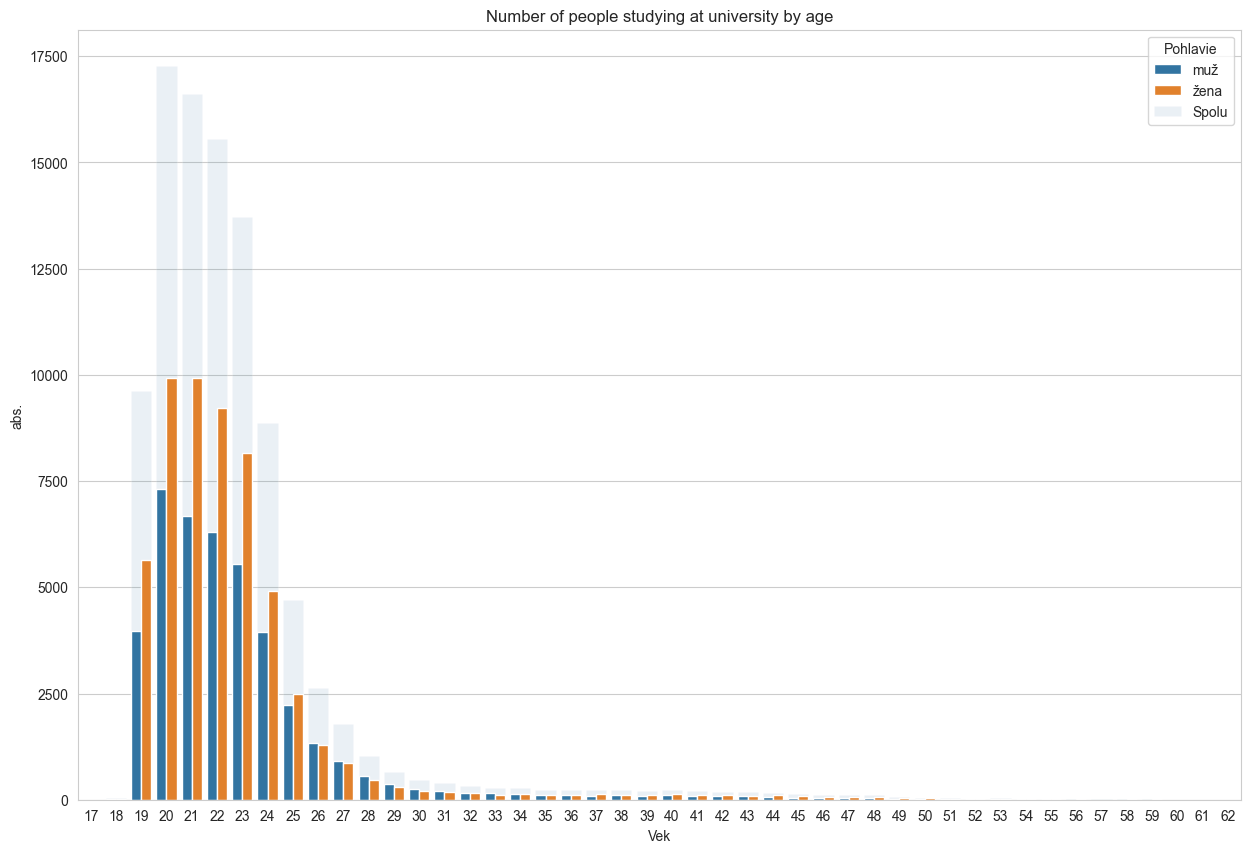

In [11]:
sns.set_style("whitegrid")
f = plt.figure(figsize=(15, 10))
axes = sns.barplot(data=university_student_all_by_age, x='Vek', y='abs.', alpha=0.1, label='Spolu')
axes = sns.barplot(data=university_student_gender_by_age, x='Vek', y='abs.', hue='Pohlavie')
axes.set_title('Number of people studying at university by age')
pass

In [12]:
working_people_without_pensioners = df_40_sr[df_40_sr['Súčasná ekonomická aktivita'] == 'pracujúci (okrem dôchodcov)']
working_people_without_pensioners_all_by_age = working_people_without_pensioners.groupby('Vek')['abs.'].sum().reset_index()
working_people_without_pensioners_gender_by_age = working_people_without_pensioners.groupby(['Vek', 'Pohlavie'])['abs.'].sum().reset_index()

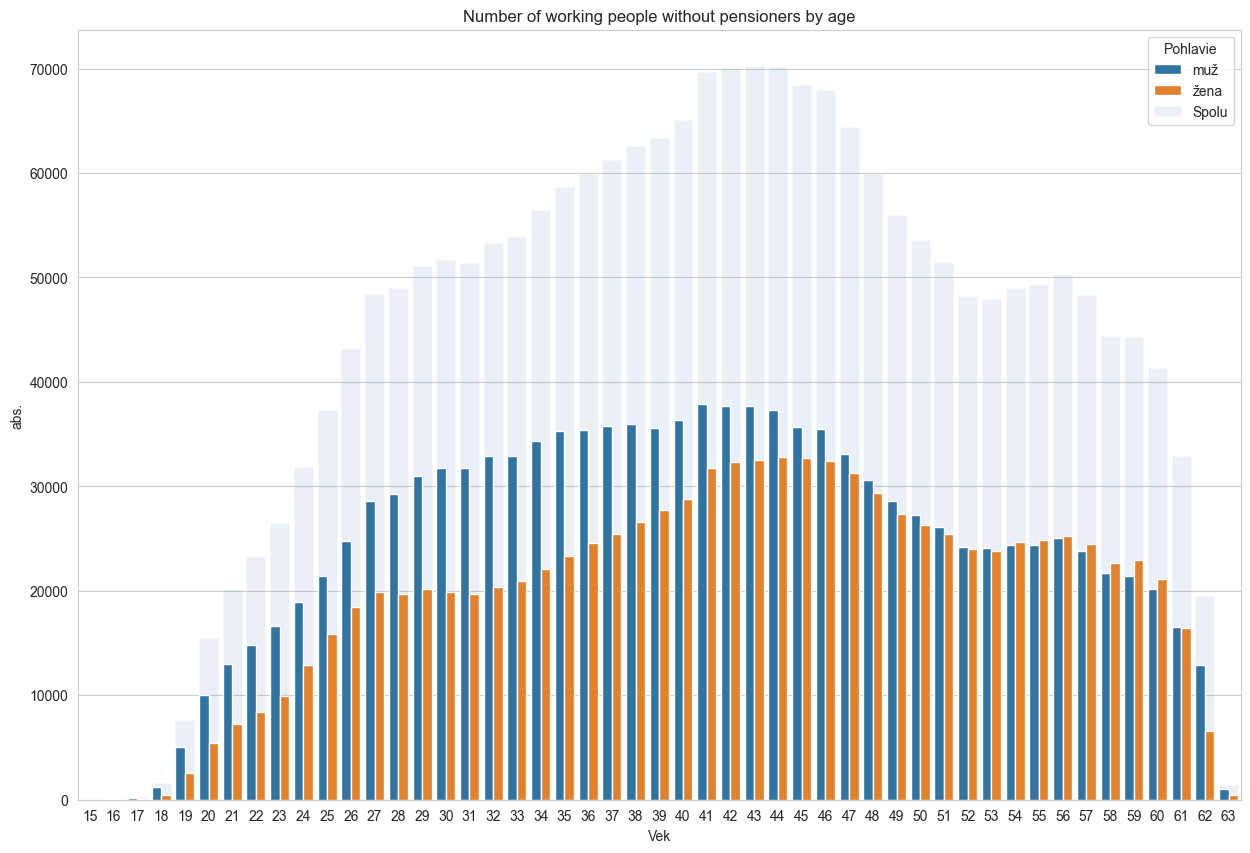

In [13]:
sns.set_style("whitegrid")
f = plt.figure(figsize=(15, 10))
axes = sns.barplot(data=working_people_without_pensioners_all_by_age, x='Vek', y='abs.', alpha=0.1, label='Spolu')
axes = sns.barplot(data=working_people_without_pensioners_gender_by_age , x='Vek', y='abs.', hue='Pohlavie')
axes.set_title('Number of working people without pensioners by age')
pass

In [14]:
working_pensioners = df_40_sr[df_40_sr['Súčasná ekonomická aktivita'] == 'pracujúci dôchodca']
working_pensioners_gender_by_age = working_pensioners.groupby(['Vek', 'Pohlavie'])['abs.'].sum().reset_index()
working_pensioners_all_by_age = working_pensioners.groupby('Vek')['abs.'].sum().reset_index()

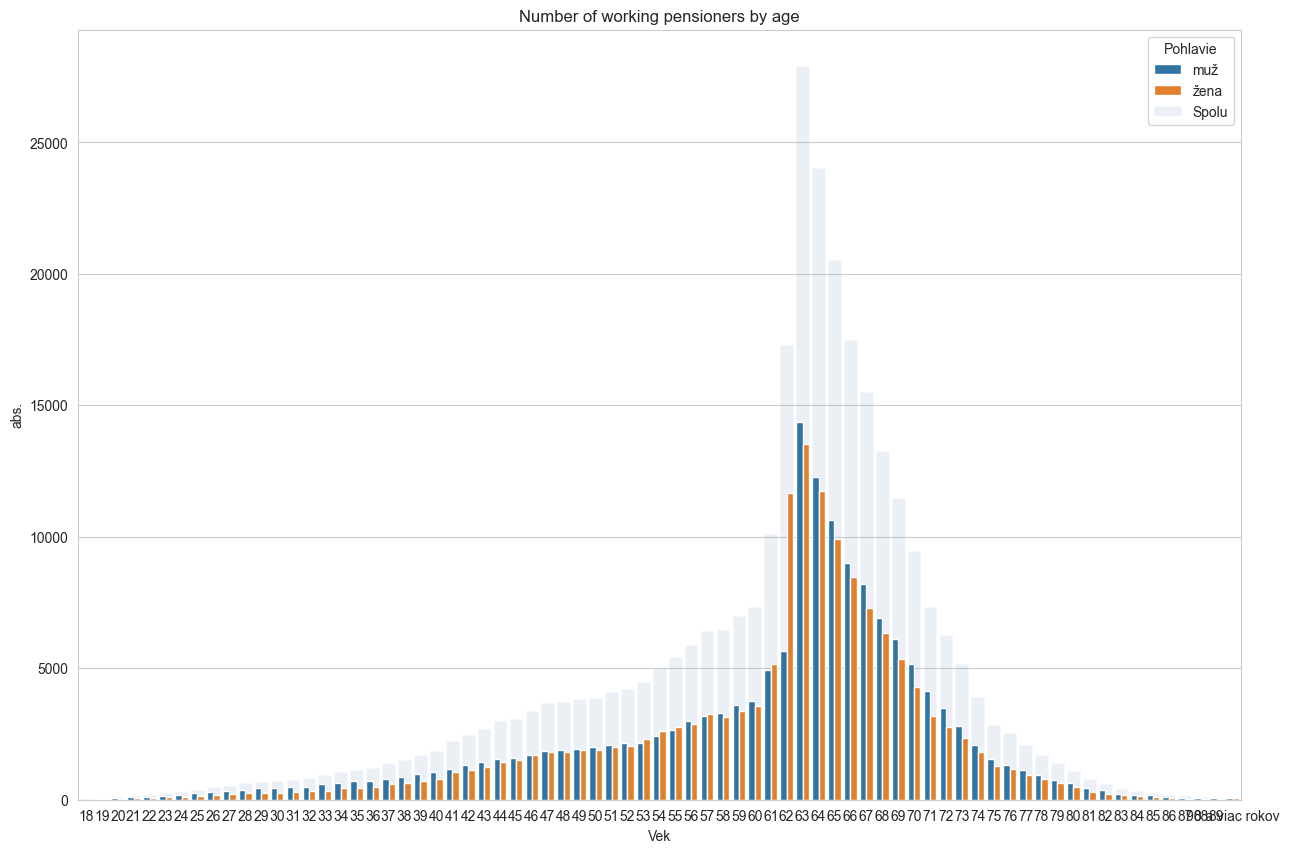

In [15]:
sns.set_style("whitegrid")
f = plt.figure(figsize=(15, 10))
axes = sns.barplot(data=working_pensioners_all_by_age, x='Vek', y='abs.', alpha=0.1, label='Spolu')
axes = sns.barplot(data=working_pensioners_gender_by_age, x='Vek', y='abs.', hue='Pohlavie')
axes.set_title('Number of working pensioners by age')
pass

In [16]:
non_working_pensioners = df_40_sr[df_40_sr['Súčasná ekonomická aktivita'] == 'dôchodca']
non_working_pensioners_gender_by_age = non_working_pensioners.groupby(['Vek', 'Pohlavie'])['abs.'].sum().reset_index()
non_working_pensioners_all_by_age = non_working_pensioners.groupby('Vek')['abs.'].sum().reset_index()

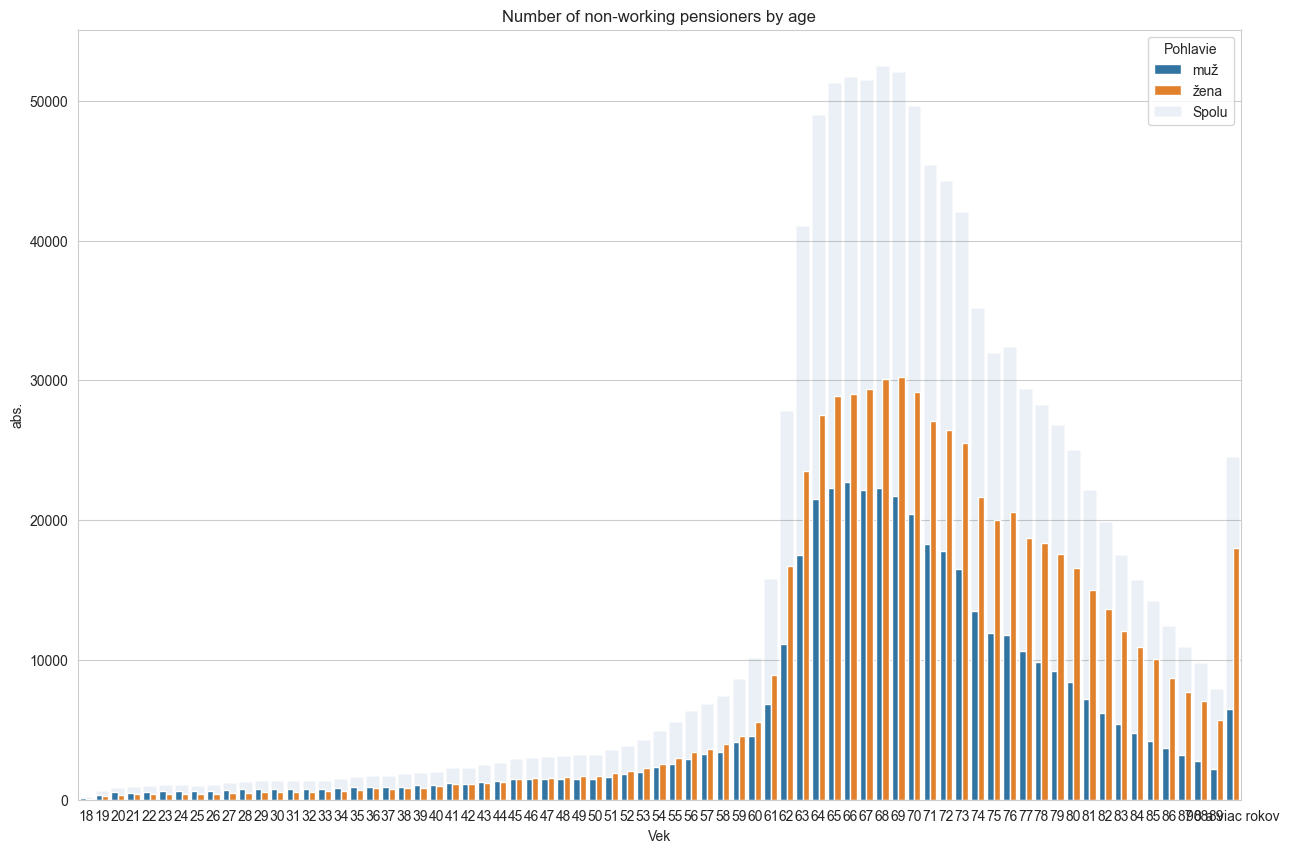

In [17]:
sns.set_style("whitegrid")
f = plt.figure(figsize=(15, 10))
axes = sns.barplot(data=non_working_pensioners_all_by_age, x='Vek', y='abs.', alpha=0.1, label='Spolu')
axes = sns.barplot(data=non_working_pensioners_gender_by_age, x='Vek', y='abs.', hue='Pohlavie')
axes.set_title('Number of non-working pensioners by age')
pass